In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost
from sklearn.model_selection import RandomizedSearchCV
from xgboost import plot_importance
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import tree
import shap
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_score, recall_score, precision_recall_curve

In [9]:
df = pd.read_csv('df_total.csv')
df = df.drop(columns = ['NU_IDADE_N'])

In [10]:
df = pd.get_dummies(df, columns = ['SG_UF'])
col_to_move = df.pop('CHIK')
df['CHIK'] = col_to_move

In [11]:
df_lab = df[df['CRITERIO'] == 'Laboratorial']
df_lab = df_lab.reset_index(drop = True)
df_epi = df[df['CRITERIO'] == 'EpiClinico'] 
df_epi = df_epi.reset_index(drop = True)
df_lab = df_lab.drop(columns = ['CRITERIO'])
df_epi = df_epi.drop(columns = ['CRITERIO'])

In [15]:
df_lab

,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,...,SG_UF_33,SG_UF_35,SG_UF_41,SG_UF_42,SG_UF_43,SG_UF_50,SG_UF_51,SG_UF_52,SG_UF_53,CHIK
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863971,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1863972,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1863973,1,1,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1863974,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


### Train-test split

In [16]:
X = df_lab.iloc[:,0:41]
y = df_lab.iloc[:,41]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 0)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, stratify = y_test, test_size = 0.5, random_state = 0)

In [17]:
print('Train: ', y_train.shape, sum(y_train == 1), sum(y_train == 0))
print('Test: ', y_test.shape, sum(y_test == 1), sum(y_test == 0))
print('Validation: ', y_val.shape, sum(y_val == 1), sum(y_val == 0))

Train:  (1304783,) 42119 1262664
Test:  (279596,) 9025 270571
Validation:  (279597,) 9026 270571


# Simple training of all models

### Logistic regression

In [18]:
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)
y_pred_train = logreg.predict_proba(X_train)[:,1]
fpr_1, tpr_1, thresholds = roc_curve(y_train, y_pred_train, pos_label = 1)
print(roc_auc_score(y_train, y_pred_train))

0.8964191452442788


In [19]:
y_pred_test = logreg.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_pred_test))

0.8968452771742157


In [21]:
feature_importance = pd.Series(logreg.coef_[0], index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
print(feature_importance)

SG_UF_25      2.528517
SG_UF_24      2.259944
SG_UF_28      1.958946
SG_UF_51      1.917163
ARTRALGIA     1.710605
SG_UF_12      1.422465
SG_UF_21      1.417814
SG_UF_26      1.318121
ARTRITE       1.021391
SG_UF_17      1.009814
SG_UF_23      0.998611
SG_UF_31      0.954851
SG_UF_29      0.701782
SG_UF_11      0.616430
SG_UF_50      0.603623
SG_UF_52      0.567391
SG_UF_16      0.553038
SG_UF_32      0.512133
EXANTEMA      0.420100
SG_UF_22      0.378280
PETEQUIA_N    0.163392
DOR_COSTAS    0.160340
MIALGIA       0.024951
SG_UF_33     -0.176068
SG_UF_27     -0.176966
CONJUNTVIT   -0.210645
LACO         -0.279203
VOMITO       -0.324706
FEBRE        -0.329843
CEFALEIA     -0.413994
NAUSEA       -0.420539
DOR_RETRO    -0.605434
SG_UF_15     -0.729495
LEUCOPENIA   -0.821009
SG_UF_14     -1.084981
SG_UF_35     -1.786563
SG_UF_13     -2.025917
SG_UF_53     -2.173902
SG_UF_41     -3.925343
SG_UF_42     -4.842381
SG_UF_43     -5.710887
dtype: float64


### Random Forest

In [22]:
rfc = RandomForestClassifier(random_state = 0)
rfc.fit(X_train ,y_train)
y_pred_train = rfc.predict_proba(X_train)[:,1]
fpr_2, tpr_2, thresholds = roc_curve(y_train, y_pred_train, pos_label = 1)
print(roc_auc_score(y_train, y_pred_train))

0.9234979030034242


In [23]:
y_pred_test = rfc.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_pred_test))

0.8800871936665879


### XGBoost

In [24]:
clx = XGBClassifier(random_state = 0, nthread = 8)
clx.fit(X_train, y_train)
y_pred_train = clx.predict_proba(X_train)[:,1]
fpr_3, tpr_3, thresholds = roc_curve(y_train, y_pred_train, pos_label = 1)
print(roc_auc_score(y_train, y_pred_train))

0.9090238498363618


In [25]:
y_pred_test = clx.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_pred_test))

0.9058613769212458


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

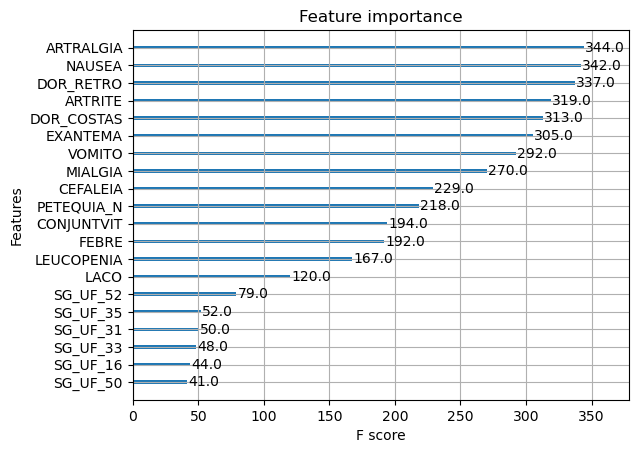

In [28]:
plot_importance(clx, importance_type='weight', max_num_features=20)

### Plotting all classifiers

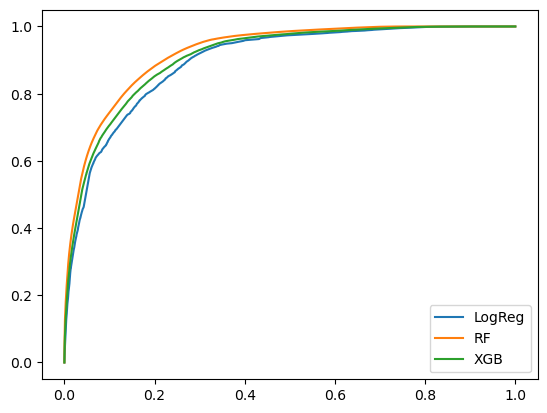

In [29]:
plt.plot(fpr_1, tpr_1, label = 'LogReg')
plt.plot(fpr_2, tpr_2, label = 'RF')
plt.plot(fpr_3, tpr_3, label = 'XGB')

plt.legend()
plt.show()

# Hyperparameter tuning

## XGBoost tuning

In [35]:
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
min_child_weight = [1, 5, 8, 10]
subsample = [0.5, 0.75, 1]
learning_rate = [ 0.01, 0.05, 0.1, 0.2, 0.3]
colsample_bytree = [0.5, 0.75, 1]
colsample_bylevel = [0.5, 0.75, 1]
scale_pos_weight = [None, 10, 20]

# Create the random grid
random_grid = {'max_depth': max_depth,
               'min_child_weight': min_child_weight,
               'subsample': subsample,
               'learning_rate': learning_rate,
               'scale_pos_weight': scale_pos_weight,
               'colsample_bytree': colsample_bytree,
               'colsample_bylevel': colsample_bylevel
               }

In [38]:
clx_random = RandomizedSearchCV(estimator = XGBClassifier(nthread = 8),
                               param_distributions = random_grid,
                               n_iter = 10,
                               scoring = 'roc_auc',
                               cv = 5, 
                               verbose = 3,
                               random_state=0)

In [39]:
clx_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END colsample_bylevel=0.5, colsample_bytree=0.75, learning_rate=0.1, max_depth=6, min_child_weight=10, scale_pos_weight=10, subsample=1;, score=0.905 total time=   7.4s
[CV 2/5] END colsample_bylevel=0.5, colsample_bytree=0.75, learning_rate=0.1, max_depth=6, min_child_weight=10, scale_pos_weight=10, subsample=1;, score=0.903 total time=   7.2s
[CV 3/5] END colsample_bylevel=0.5, colsample_bytree=0.75, learning_rate=0.1, max_depth=6, min_child_weight=10, scale_pos_weight=10, subsample=1;, score=0.906 total time=   7.2s
[CV 4/5] END colsample_bylevel=0.5, colsample_bytree=0.75, learning_rate=0.1, max_depth=6, min_child_weight=10, scale_pos_weight=10, subsample=1;, score=0.903 total time=   7.2s
[CV 5/5] END colsample_bylevel=0.5, colsample_bytree=0.75, learning_rate=0.1, max_depth=6, min_child_weight=10, scale_pos_weight=10, subsample=1;, score=0.902 total time=   7.5s
[CV 1/5] END colsample_bylevel=0.75, colsample_by

[CV 2/5] END colsample_bylevel=0.75, colsample_bytree=0.75, learning_rate=0.05, max_depth=10, min_child_weight=1, scale_pos_weight=20, subsample=0.75;, score=0.904 total time=  12.1s
[CV 3/5] END colsample_bylevel=0.75, colsample_bytree=0.75, learning_rate=0.05, max_depth=10, min_child_weight=1, scale_pos_weight=20, subsample=0.75;, score=0.906 total time=  11.9s
[CV 4/5] END colsample_bylevel=0.75, colsample_bytree=0.75, learning_rate=0.05, max_depth=10, min_child_weight=1, scale_pos_weight=20, subsample=0.75;, score=0.903 total time=  12.2s
[CV 5/5] END colsample_bylevel=0.75, colsample_bytree=0.75, learning_rate=0.05, max_depth=10, min_child_weight=1, scale_pos_weight=20, subsample=0.75;, score=0.903 total time=  12.0s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           nthread=8, num_parallel_tree=None, ...),
                   param_distributions={'colsample_bylevel': [0.5, 0.75, 1],
                                        'colsample_bytree': [0.5, 0.75, 1],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_child_weight': [1, 5, 8, 10],
                                        'scale_pos_weight': [None, 10, 20],
                                        'subsample': [0.5, 0.75, 1]},
                   random_state=0, scoring='roc_auc', verbose=3)

In [40]:
est = clx_random.best_estimator_

In [41]:
y_pred_train = est.predict_proba(X_train)[:,1]
y_pred_test = est.predict_proba(X_test)[:,1]
print(roc_auc_score(y_train, y_pred_train))
print(roc_auc_score(y_test, y_pred_test))

0.9099948314879004
0.9056453960077514


In [43]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test, pos_label = 1)

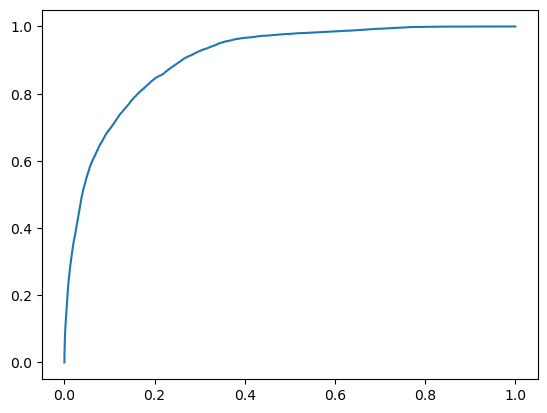

In [44]:
plt.plot(fpr, tpr)

Text(0, 0.5, 'rate')

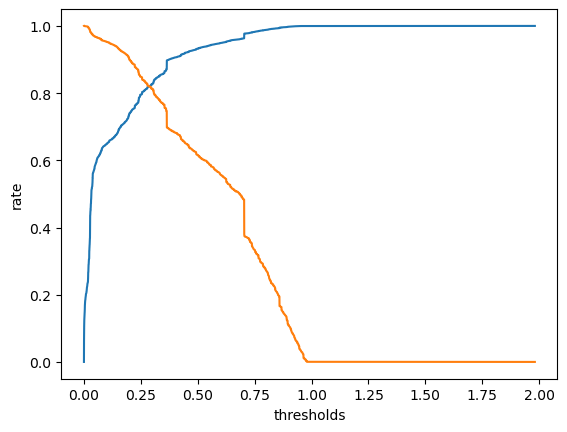

In [48]:
plt.plot(thresholds, 1-fpr)
plt.plot(thresholds, tpr)
plt.xlabel('thresholds')
plt.ylabel('rate')

In [53]:
best_arg = np.argmin(abs(tpr-(1-fpr))) 
best_thr = thresholds[np.argmin(abs(tpr-(1-fpr)))]
print(best_thr)
print(tpr[best_arg])
print((1-fpr)[best_arg])

0.28559282
0.820387811634349
0.82041312631435


In [54]:
X = df_epi.iloc[:,0:41]
y = df_epi.iloc[:,41]

In [57]:
y_corrected = est.predict_proba(X)[:,1]
y_chik = (y_corrected >= best_thr)
y_denv = (y_corrected < best_thr)
y_corrected[y_chik] = 1
y_corrected[y_denv] = 0

In [59]:
print('Total Chik Corr: ', sum(y_corrected == 1) + sum(df_lab['CHIK'] == 1))
print('Total Chik SINAN: ', sum(df_epi['CHIK'] == 1) + sum(df_lab['CHIK'] == 1))

Total Chik Corr:  826977
Total Chik SINAN:  152427


### Doing this by state

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 3000x1000 with 0 Axes>

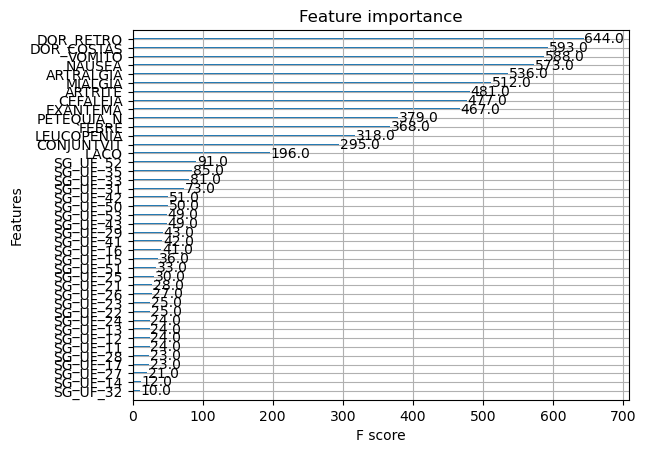

In [65]:
plt.figure(figsize = (30,10))
plot_importance(est, importance_type='weight', max_num_features=42)